<a href="https://colab.research.google.com/github/esgryaznova/python_course_materials/blob/master/Gryaznova_%22Parsing_IMDB_Homework_3_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [103]:
%matplotlib inline
import requests
from bs4 import BeautifulSoup
import os
import pandas as pd
import time
import re
import seaborn
from lxml import html
import matplotlib.pyplot as plt
import numpy as np

%config InlineBackend.figure_format = 'svg'
from pylab import rcParams
rcParams['figure.figsize'] = 8, 5

Получаем 250 самых топовых фильмов

In [73]:
url = 'http://www.imdb.com/chart/top'
response = requests.get(url)
soup = BeautifulSoup(response.text, 'lxml')

Парсим страницу с фильмами и получаем грязные данные с


1.   Названием фильма
2.   Рейтингом
3.   Командой 
4.   Ссылкой на основную страницу




In [74]:
movies = soup.select('td.titleColumn')
links = [a.attrs.get('href') for a in soup.select('td.titleColumn a')]
crew = [a.attrs.get('title') for a in soup.select('td.titleColumn a')]
ratings = [b.attrs.get('data-value') for b in soup.select('td.posterColumn span[name=ir]')]

In [186]:
data_frame = {
    "movies": movies,
    "ratings": ratings,
    "crew": crew,
    "links": links
}

data = pd.DataFrame(data_frame)
data

,movies,ratings,crew,links
0,"[\n 1.\n , [The Shawshank Redemption...",9.239993921196751,"Frank Darabont (dir.), Tim Robbins, Morgan Fre...",/title/tt0111161/
1,"[\n 2.\n , [The Godfather], \n, [(19...",9.160995179050309,"Francis Ford Coppola (dir.), Marlon Brando, Al...",/title/tt0068646/
2,"[\n 3.\n , [The Dark Knight], \n, [(...",8.993868740108754,"Christopher Nolan (dir.), Christian Bale, Heat...",/title/tt0468569/
3,"[\n 4.\n , [The Godfather: Part II],...",8.990118594525812,"Francis Ford Coppola (dir.), Al Pacino, Robert...",/title/tt0071562/
4,"[\n 5.\n , [De 12 gezworenen], \n, [...",8.950779652472843,"Sidney Lumet (dir.), Henry Fonda, Lee J. Cobb",/title/tt0050083/
...,...,...,...,...
245,"[\n 246.\n , [Belle en het Beest], \...",8.016659321612929,"Gary Trousdale (dir.), Paige O'Hara, Robby Benson",/title/tt0101414/
246,"[\n 247.\n , [Gandhi], \n, [(1982)],...",8.01527478895538,"Richard Attenborough (dir.), Ben Kingsley, Joh...",/title/tt0083987/
247,"[\n 248.\n , [The Help], \n, [(2011)...",8.014459497629044,"Tate Taylor (dir.), Emma Stone, Viola Davis",/title/tt1454029/
248,"[\n 249.\n , [Ah-ga-ssi], \n, [(2016...",8.012740097465755,"Park Chan-wook (dir.), Kim Min-hee, Ha Jung-woo",/title/tt4016934/


Несколько функциий для преобзразования грязных заголовков с названием фильмов


In [187]:
def process_text_mv(text):
    data = text.get_text().split("\n")
    return data[2].strip()

In [188]:
def process_text_year(text):
    data = text.get_text().split("\n")
    return data[3].strip()[1:-1]

In [189]:
data["title"] = data.movies.apply(process_text_mv)
data["year"] = data.movies.apply(process_text_year)

In [79]:
data.head()

,movies,ratings,crew,links,title,year
0,"[\n 1.\n , [The Shawshank Redemption...",9.239993921196751,"Frank Darabont (dir.), Tim Robbins, Morgan Fre...",/title/tt0111161/,The Shawshank Redemption,1994
1,"[\n 2.\n , [The Godfather], \n, [(19...",9.160995179050309,"Francis Ford Coppola (dir.), Marlon Brando, Al...",/title/tt0068646/,The Godfather,1972
2,"[\n 3.\n , [The Dark Knight], \n, [(...",8.993868740108754,"Christopher Nolan (dir.), Christian Bale, Heat...",/title/tt0468569/,The Dark Knight,2008
3,"[\n 4.\n , [The Godfather: Part II],...",8.990118594525812,"Francis Ford Coppola (dir.), Al Pacino, Robert...",/title/tt0071562/,The Godfather: Part II,1974
4,"[\n 5.\n , [De 12 gezworenen], \n, [...",8.950779652472843,"Sidney Lumet (dir.), Henry Fonda, Lee J. Cobb",/title/tt0050083/,De 12 gezworenen,1957


In [80]:
data.crew[1]

'Francis Ford Coppola (dir.), Marlon Brando, Al Pacino'

Задача 1.
Получить список всех участников команд (убрать постфикс `(dir.)` у директоров). Найти количество уникальных имен. 

Задача 2.
Получить список всех директоров. Построить распределение (визуализация обязательна) и найти директора(ов), у которого(ых) больше всего фильмов в топе.

Задача 3. Найти участника(ов) команд, у которого(ых) больше всего фильмов в топе.

Задача 4. Построить распределение топовых фильмов по годам

Задача 5. Построить распределение топовых фильмов рейтингу:


*   Округлить до сотых и отрисовать
*   Округлить до десятых и отрисовать
*   Округлить до целых и отрисовать

Задача 6. Используйте ссылку `http://www.imdb.com/` и динамически добавляя ссылку на фильм из колонки `links` соберите описание фильмов. Пример поиска необходимого текст представлен ниже. Добавьте эту информацию в исходный датафрейм.










In [83]:
#Задача 1. Получить список всех участников команд (убрать постфикс (dir.) у директоров). Найти количество уникальных имен.

unique_names = []
for i in data.crew.values:
    for name in i.replace("(dir.)", "").split(", "):
        unique_names.append(name)
    
print(f"Количество уникальных имен: {len(set(unique_names))}")

Количество уникальных имен: 536


In [68]:
#Полный список имен -> 
#unique_names

In [87]:
#Задача 2. Получить список всех директоров. 
#Построить распределение (визуализация обязательна) и найти директора(ов), у которого(ых) больше всего фильмов в топе.

directors = {}
for i in data.crew.values:
    for name in i.split(", "):
        if name.endswith("(dir.)"):
            if name in directors:
                directors[name] += 1
            else:
                directors[name] = 1

#directors

In [93]:
s = pd.Series(directors, name='number')
s.index.name = 'name'
s = s.reset_index()
s

,name,number
0,Frank Darabont (dir.),2
1,Francis Ford Coppola (dir.),3
2,Christopher Nolan (dir.),7
3,Sidney Lumet (dir.),2
4,Steven Spielberg (dir.),7
...,...,...
149,Ron Clements (dir.),1
150,Gary Trousdale (dir.),1
151,Richard Attenborough (dir.),1
152,Tate Taylor (dir.),1


In [105]:
s.sort_values(by = "number", ascending = False)[:20]

,name,number
40,Stanley Kubrick (dir.),7
2,Christopher Nolan (dir.),7
4,Steven Spielberg (dir.),7
12,Martin Scorsese (dir.),7
14,Akira Kurosawa (dir.),7
22,Alfred Hitchcock (dir.),6
39,Billy Wilder (dir.),5
33,Charles Chaplin (dir.),5
6,Quentin Tarantino (dir.),5
7,Sergio Leone (dir.),4


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text major ticklabel objects>)

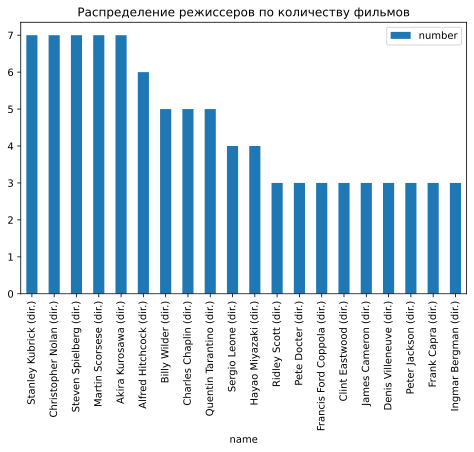

In [123]:
top_s = s.sort_values(by = "number", ascending = False)[:20]
top_s.plot.bar(x = "name", y = "number", title="Распределение режиссеров по количеству фильмов")
plt.xticks(rotation = 90)

In [127]:
#Задача 3. Найти участника(ов) команд, у которого(ых) больше всего фильмов в топе.

actors = {}
for i in data.crew.values:
    for name in i.split(", "):
        if not name.endswith(" (dir.)"):
            if name in actors:
                actors[name] += 1
            else:
                actors[name] = 1

#actors

In [129]:
a = pd.Series(actors, name='number')
a.index.name = 'name'
a = a.reset_index()

a.sort_values(by = "number", ascending = False)[:20]

,name,number
6,Robert De Niro,9
18,Tom Hanks,6
25,Harrison Ford,6
16,Clint Eastwood,5
4,Christian Bale,5
22,Leonardo DiCaprio,5
73,Charles Chaplin,5
37,Matt Damon,4
3,Al Pacino,4
20,Brad Pitt,4


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text major ticklabel objects>)

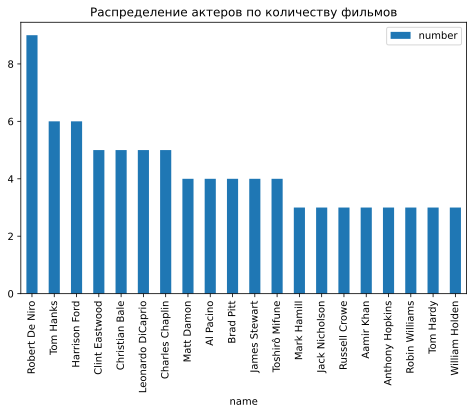

In [130]:
top_a = a.sort_values(by = "number", ascending = False)[:20]
top_a.plot.bar(x = "name", y = "number", title="Распределение актеров по количеству фильмов")
plt.xticks(rotation = 90)

In [132]:
#Задача 4. Построить распределение топовых фильмов по годам

films = {}
for film in data.year.values:
    if film in films:
        films[film] += 1
    else:
        films[film] = 1

#films

In [134]:
f = pd.Series(films, name='number')
f.index.name = 'year'
f = f.reset_index()

f.sort_values(by = "number", ascending = False)[:20]

,year,number
15,1995,8
51,2004,7
4,1957,6
25,2019,6
6,2003,6
46,2009,6
0,1994,5
26,2000,5
19,1998,5
22,2014,5


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text major ticklabel objects>)

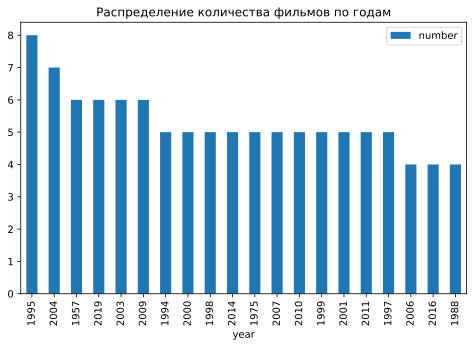

In [135]:
top_f = f.sort_values(by = "number", ascending = False)[:20]
top_f.plot.bar(x = "year", y = "number", title="Распределение количества фильмов по годам")
plt.xticks(rotation = 90)

(array([7.8, 8. , 8.2, 8.4, 8.6, 8.8, 9. , 9.2, 9.4]),
 <a list of 9 Text major ticklabel objects>)

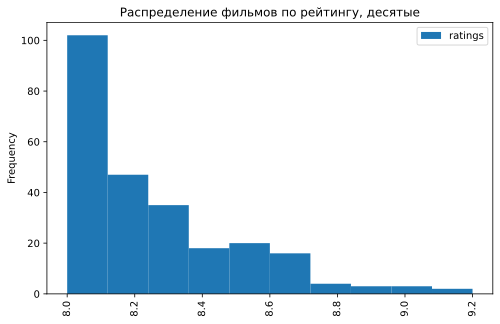

In [195]:
#Задача 5. Построить распределение топовых фильмов по рейтингу:
#Округлить до сотых и отрисовать
#Округлить до десятых и отрисовать
#Округлить до целых и отрисовать
data_10 = data
data_10["ratings"] = data_10["ratings"].astype(float).values.round(1)
data_10.plot.hist(x = "movies", y = "ratings", title = "Распределение фильмов по рейтингу, десятые")
plt.xticks(rotation = 90)

(array([7.8, 8. , 8.2, 8.4, 8.6, 8.8, 9. , 9.2, 9.4]),
 <a list of 9 Text major ticklabel objects>)

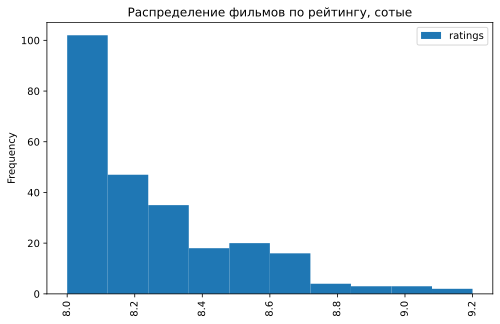

In [196]:
data_100 = data
data_100["ratings"] = data_100["ratings"].astype(float).values.round(2)
data.plot.hist(x = "movies", y = "ratings", title = "Распределение фильмов по рейтингу, сотые")
plt.xticks(rotation = 90)

(array([7.8, 8. , 8.2, 8.4, 8.6, 8.8, 9. , 9.2]),
 <a list of 8 Text major ticklabel objects>)

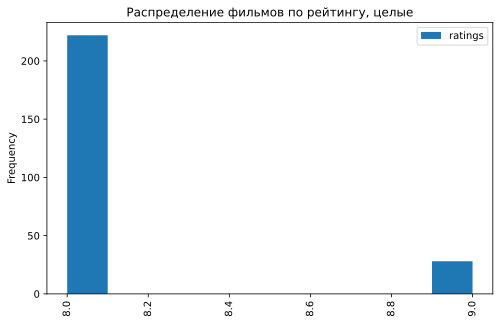

In [202]:
data_0 = data
data_0["ratings"] = data_0["ratings"].astype(float).values.round(0)
data_0.plot.hist(x = "movies", y = "ratings", title = "Распределение фильмов по рейтингу, целые")
plt.xticks(rotation = 90)
#не робiт((

In [164]:
#Задача 6. Используйте ссылку http://www.imdb.com/ и динамически добавляя ссылку на фильм из колонки links соберите описание фильмов. 
#Пример поиска необходимого текст представлен ниже. Добавьте эту информацию в исходный датафрейм.

film_url = 'http://www.imdb.com/title/tt0068646/'
html_text = requests.get(film_url).text
soup = BeautifulSoup(html_text, 'lxml')
soup.find_all(attrs={"name": "description"})[0].get("content")

'The Godfather: Directed by Francis Ford Coppola. With Marlon Brando, Al Pacino, James Caan, Richard S. Castellano. The aging patriarch of an organized crime dynasty in postwar New York City transfers control of his clandestine empire to his reluctant youngest son.'

In [168]:
def download_description(source):
    film_url = 'http://www.imdb.com'+source
    html_text = requests.get(film_url).text
    soup = BeautifulSoup(html_text, 'lxml')
    return soup.find_all(attrs={"name": "description"})[0].get("content")

In [169]:
new = []
for i in data.links.values:
    new.append(download_description(i))

In [170]:
data["description"] = new
data

,movies,ratings,crew,links,title,year,description
0,"[\n 1.\n , [The Shawshank Redemption...",9.0,"Frank Darabont (dir.), Tim Robbins, Morgan Fre...",/title/tt0111161/,The Shawshank Redemption,1994,The Shawshank Redemption: Directed by Frank Da...
1,"[\n 2.\n , [The Godfather], \n, [(19...",9.0,"Francis Ford Coppola (dir.), Marlon Brando, Al...",/title/tt0068646/,The Godfather,1972,The Godfather: Directed by Francis Ford Coppol...
2,"[\n 3.\n , [The Dark Knight], \n, [(...",9.0,"Christopher Nolan (dir.), Christian Bale, Heat...",/title/tt0468569/,The Dark Knight,2008,The Dark Knight: Directed by Christopher Nolan...
3,"[\n 4.\n , [The Godfather: Part II],...",9.0,"Francis Ford Coppola (dir.), Al Pacino, Robert...",/title/tt0071562/,The Godfather: Part II,1974,The Godfather: Part II: Directed by Francis Fo...
4,"[\n 5.\n , [De 12 gezworenen], \n, [...",9.0,"Sidney Lumet (dir.), Henry Fonda, Lee J. Cobb",/title/tt0050083/,De 12 gezworenen,1957,De 12 gezworenen: Directed by Sidney Lumet. Wi...
...,...,...,...,...,...,...,...
245,"[\n 246.\n , [Belle en het Beest], \...",8.0,"Gary Trousdale (dir.), Paige O'Hara, Robby Benson",/title/tt0101414/,Belle en het Beest,1991,Belle en het Beest: Directed by Gary Trousdale...
246,"[\n 247.\n , [Gandhi], \n, [(1982)],...",8.0,"Richard Attenborough (dir.), Ben Kingsley, Joh...",/title/tt0083987/,Gandhi,1982,Gandhi: Directed by Richard Attenborough. With...
247,"[\n 248.\n , [The Help], \n, [(2011)...",8.0,"Tate Taylor (dir.), Emma Stone, Viola Davis",/title/tt1454029/,The Help,2011,The Help: Directed by Tate Taylor. With Emma S...
248,"[\n 249.\n , [Ah-ga-ssi], \n, [(2016...",8.0,"Park Chan-wook (dir.), Kim Min-hee, Ha Jung-woo",/title/tt4016934/,Ah-ga-ssi,2016,Ah-ga-ssi: Directed by Park Chan-wook. With Ki...



Задача 7. С помощью регулярных выражений найдите в текстах описания фильмов имена актеров, если это возможно (то есть - они там упоминаются). Добавьте эту информацию в датафрейм и посчитайте, для скольких фильмов получилось это сдлеать. Подсказка: перечисление актеров иногда начинается с with. 


Задача 8. Распарсите исходную страницу с топ-250 фильмов и получите для каждого фильмов количество оценок. Пример текста в исходной странице:`9.2 based on 2,554,919 user ratings`. Из этого текста нужно достать = `2,554,919`. Подсказка: используя метод `find_all` с аргументом `attrs` в который нужно передать `{'class': 'ratingColumn imdbRating'}` от страници `http://www.imdb.com/chart/top`. Найдите 10 фильмов (вывести их название и кол-во оценок) у которых, самое большое количество оценок.


Задача 9. Постройте топ 10 слов, которые встречаются 

1.   в названии фильмов
2.   в описании фильмов
3.   в названии и в описании фильмов


Задача 10*. Спарсить теги фильмов со страницы каждого фильма, так например для `The Godfather` ожидается получить список из `Crime, Drama`. (Можно увидеть эти теги по картинкой к фильму)


In [173]:
#Задача 7. С помощью регулярных выражений найдите в текстах описания фильмов имена актеров, если это возможно (то есть - они там упоминаются). 
#Добавьте эту информацию в датафрейм и посчитайте, для скольких фильмов получилось это сделать. Подсказка: перечисление актеров иногда начинается с with.

#data["description"] = data["description"].values.lower()
#def find_names(str):
#  str.lower()


#           if name in actors:

In [174]:
#Задача 9. Топ 10 слов

#в названиях
top_words_in_titles = {}

for title in data.title.values:
    for word in title.lower().split():
        if word in top_words_in_titles:
            top_words_in_titles[word] += 1
        else:
            top_words_in_titles[word] = 1


In [175]:
t_n = pd.Series(top_words_in_titles, name='number')
t_n.index.name = 'word'
t_n = t_n.reset_index()

t_n.sort_values(by = "number", ascending = False)[:20]

,word,number
0,the,76
15,of,19
9,de,15
54,a,10
25,and,8
51,no,7
64,het,7
144,for,6
102,in,6
155,to,5


In [181]:
#в описании фильмов
top_words_in_description = {}

for description in data.description.values:
    for word in description.lower().split():
        if word in top_words_in_description:
            top_words_in_description[word] += 1
        else:
            top_words_in_description[word] = 1

t_d = pd.Series(top_words_in_description, name='number')
t_d.index.name = 'word'
t_d = t_d.reset_index()

t_d.sort_values(by = "number", ascending = False)[:20]

,word,number
0,the,434
21,a,393
7,with,314
4,by,297
3,directed,250
63,to,234
23,of,222
27,and,186
53,in,157
60,his,146


In [182]:
#в названиях и описании
title_and_description= {}

for title in data.title.values:
    for word in title.lower().split():
        if word in title_and_description:
            title_and_description[word] += 1
        else:
            title_and_description[word] = 1

for description in data.description.values:
    for word in description.lower().split():
        if word in title_and_description:
            title_and_description[word] += 1
        else:
            title_and_description[word] = 1

t_nd = pd.Series(title_and_description, name='number')
t_nd.index.name = 'word'
t_nd = t_nd.reset_index()

t_nd.sort_values(by = "number", ascending = False)[:20]

,word,number
0,the,510
54,a,403
512,with,315
213,by,299
515,directed,250
15,of,241
155,to,239
25,and,194
102,in,163
559,his,146
